#### Name: Marwa Samy
#### Project:Google Play Store Apps Discovery

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv('googleplaystore.csv')
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [106]:
print('Numbers of rows are',data.shape[0])
print('Numbers of Columns are',data.shape[1])

Numbers of rows are 10841
Numbers of Columns are 13


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Data Preprocessing

In [108]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [109]:
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

In [110]:
data.duplicated().sum()

483

In [111]:
data.drop_duplicates(inplace=True)

In [112]:
data.duplicated().sum().any()

False

In [113]:
data=data.drop(data[data['Category']=='1.9'].index)

In [114]:
data['Price']=data['Price'].str.replace('$','')

In [115]:
data['Price']=data['Price'].astype('float')

In [116]:
data['Type']=data['Type'].replace('0','Free')

In [118]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [119]:
data['Installs']=data['Installs'].str.replace(',','')

In [120]:
data['Installs']=data['Installs'].str.replace('+','')

In [121]:
data['Installs'].astype(int)

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10357, dtype: int32

In [122]:
data.describe(include='all').round()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10357,10357,10357.0,10357,10357,10357,10356,10357.0,10357,10357,10357,10349,10355
unique,9659,33,NaN,6001,461,20,2,NaN,6,119,1377,2831,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,1000000,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9591,NaN,8382,842,298,1302,2379
mean,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis (EDA)

Count the number of apps in each category

In [123]:
data['Category'].nunique()

33

High Rating of Category

In [247]:
data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head()

Category
EDUCATION              4.374564
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311943
PERSONALIZATION        4.305620
Name: Rating, dtype: float64

In [125]:
category_counts = data['Category'].value_counts()
print(category_counts)

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64


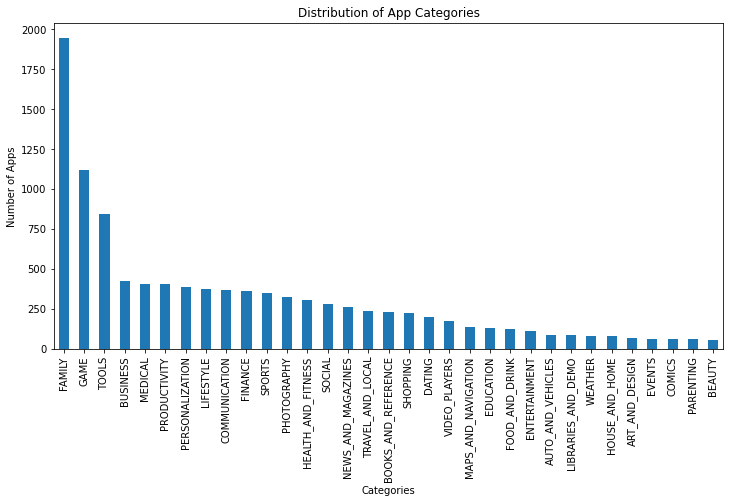

In [126]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of App Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

Calculate the average rating of apps

In [139]:
data['Rating'].mean()

4.18864928376987

In [128]:
len(data[data['Rating']==5.0])

271

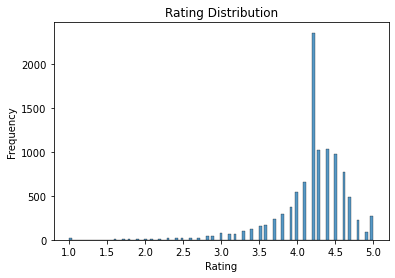

In [129]:
#Analyze the distribution of ratings using a histogram
sns.histplot(data['Rating'])
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

Top 10 most Popular Apps are downloading

In [131]:
data['Installs']=data['Installs'].astype(int)

In [249]:
app_Installs = data[['App','Installs']].sort_values(by='Installs',ascending=False).head(10)
app_Installs

,App,Installs
341,Hangouts,1000000000
3928,YouTube,1000000000
451,Gmail,1000000000
3996,Google Chrome: Fast & Secure,1000000000
1700,Subway Surfers,1000000000
3454,Google Drive,1000000000
2808,Google Photos,1000000000
865,Google Play Games,1000000000
2853,Google Photos,1000000000
411,Google Chrome: Fast & Secure,1000000000


In [223]:
data.groupby('App')['Installs'].mean().sort_values(ascending=False).head()

App
Google Play Movies & TV                     1.000000e+09
Google Chrome: Fast & Secure                1.000000e+09
Messenger – Text and Video Chat for Free    1.000000e+09
Maps - Navigate & Explore                   1.000000e+09
Google Play Games                           1.000000e+09
Name: Installs, dtype: float64

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


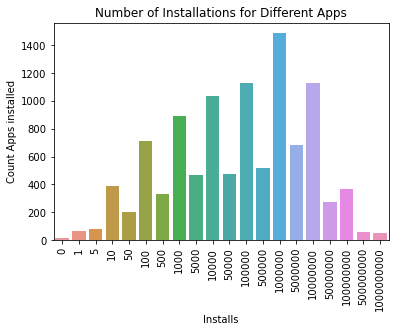

In [133]:
sns.countplot(data['Installs'])
plt.title("Number of Installations for Different Apps")
plt.xlabel("Installs")
plt.ylabel("Count Apps installed")
plt.xticks(rotation=90)
plt.show()

In [134]:
data["Reviews"]=data["Reviews"].astype(int)

In [135]:
average_ratings = data.groupby("App")["Rating"].mean()
average_ratings

App
"i DT" Fútbol. Todos Somos Técnicos.                4.193338
+Download 4 Instagram Twitter                       4.500000
- Free Comics - Comic Apps                          3.500000
.R                                                  4.500000
/u/app                                              4.700000
                                                      ...   
뽕티비 - 개인방송, 인터넷방송, BJ방송                             4.193338
💎 I'm rich                                          3.800000
💘 WhatsLov: Smileys of love, stickers and GIF       4.600000
📏 Smart Ruler ↔️ cm/inch measuring for homework!    4.000000
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    4.700000
Name: Rating, Length: 9659, dtype: float64

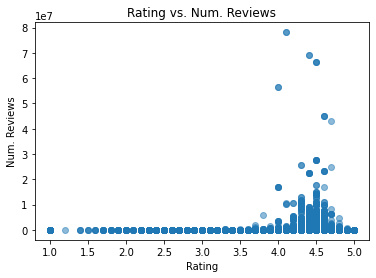

In [149]:
#Examine the correlation between ratings and the number of reviews
plt.scatter(data["Rating"], data["Reviews"], alpha=0.5)

# Set the title and labels of the plot
plt.title("Rating vs. Num. Reviews")
plt.xlabel("Rating")
plt.ylabel("Num. Reviews")

# Show the plot
plt.show()


Count the number of apps in each genre

In [150]:
genre_counts = data["Genres"].value_counts()
genre_counts = genre_counts.sort_values(ascending=False)
genre_counts

Tools                                  842
Entertainment                          588
Education                              527
Business                               427
Medical                                408
                                      ... 
Health & Fitness;Education               1
Tools;Education                          1
Lifestyle;Education                      1
Health & Fitness;Action & Adventure      1
Music & Audio;Music & Video              1
Name: Genres, Length: 119, dtype: int64

Top 10 most common genres

In [151]:
print(genre_counts.head(10))

Tools              842
Entertainment      588
Education          527
Business           427
Medical            408
Productivity       407
Personalization    388
Lifestyle          372
Communication      366
Sports             364
Name: Genres, dtype: int64


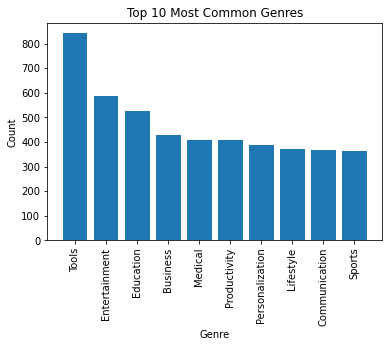

In [152]:
plt.bar(genre_counts.index[:10], genre_counts.values[:10])
# Set the title and labels of the plot
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [153]:
data['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


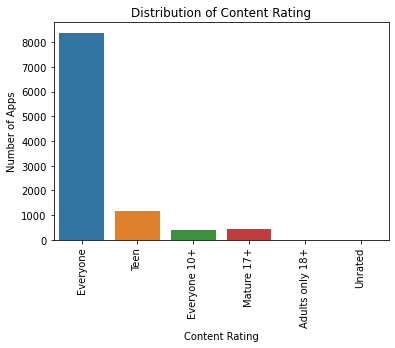

In [159]:
sns.countplot(data['Content Rating'])
plt.title('Distribution of Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

In [187]:
data['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


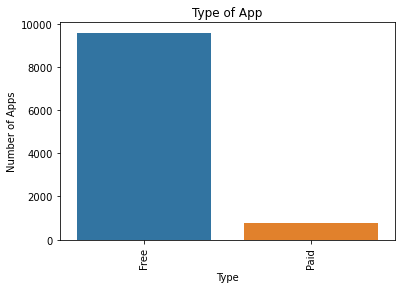

In [162]:
sns.countplot(data['Type'])
plt.title('Type of App')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

In [174]:
data['Price'].max()

400.0

In [167]:
top_App=data.groupby('App')['Price'].mean().sort_values(ascending=False).head(10)
top_App

App
I'm Rich - Trump Edition          400.00
I Am Rich Premium                 399.99
I am rich (Most expensive app)    399.99
I am Rich                         399.99
I am Rich Plus                    399.99
I am Rich!                        399.99
I am rich                         399.99
most expensive app (H)            399.99
I AM RICH PRO PLUS                399.99
I Am Rich Pro                     399.99
Name: Price, dtype: float64

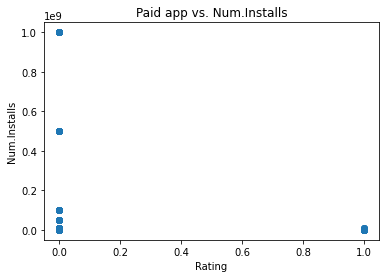

In [197]:
plt.scatter(data['Type']=='Paid',data['Installs'])
# Set the title and labels of the plot
plt.title("Paid app vs. Num.Installs")
plt.xlabel("Rating")
plt.ylabel("Num.Installs")
plt.show()

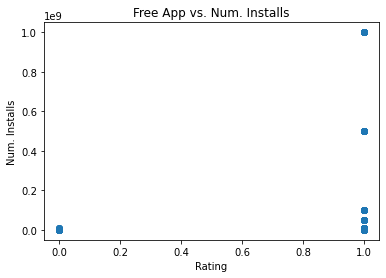

In [196]:
plt.scatter(data['Type']=='Free',data['Installs'])
# Set the title and labels of the plot
plt.title("Free App vs. Num. Installs")
plt.xlabel("Rating")
plt.ylabel("Num. Installs")
plt.show()

In [198]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [201]:
data['Size'].value_counts()

Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
779k                     1
939k                     1
518k                     1
288k                     1
404k                     1
Name: Size, Length: 461, dtype: int64

Calculate Last Updated of Apps

In [203]:
data['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10357, dtype: object

In [245]:
data['Last Updated'].apply(lambda x:x.split(',')[1]).value_counts().head()

 2018    6934
 2017    1826
 2016     789
 2015     454
 2014     204
Name: Last Updated, dtype: int64

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Last Updated', ylabel='count'>

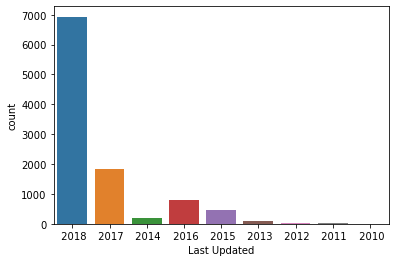

In [244]:
sns.countplot(data['Last Updated'].apply(lambda x:x.split(',')[1]))

The most App Reviews

In [206]:
data[data['Reviews'].max()==data['Reviews']]['App']

2544    Facebook
Name: App, dtype: object

Top 5 Apps have most Reviews

In [212]:
index=data['Reviews'].sort_values(ascending=False).head().index

In [228]:
ss=data.iloc[index]['App']

C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


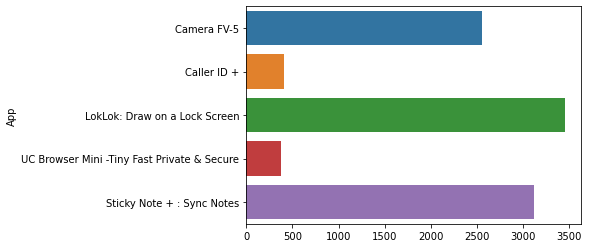

In [230]:
sns.barplot(index,ss,data=data)
plt.show()

Average of Rating for Different Type apps

In [225]:
data.groupby('Type')['Rating'].mean().sort_values(ascending=False)

Type
Paid    4.247957
Free    4.183918
Name: Rating, dtype: float64